In [309]:
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [310]:
df_grad= pd.read_csv("/Users/nicolerodriguez/gwcla/data/Graduation_results_for_Cohorts_2001_to_2011__Classes_of_2005_to_2015__20241007.csv")

/var/folders/fr/r5h17zrs40z1ykh6yttmmpd00000gn/T/ipykernel_21491/1184582186.py:1: DtypeWarning: Columns (25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_grad= pd.read_csv("/Users/nicolerodriguez/gwcla/data/Graduation_results_for_Cohorts_2001_to_2011__Classes_of_2005_to_2015__20241007.csv")


In [311]:
df_grad.head()

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2011,4 year August,74363,52409,70.5,49364,...,4.1,5.8,13927,18.7,6664,9.0,741,1.0,484,0.7
1,Citywide,Citywide,NaN,All Students,2010,4 year August,75524,51681,68.4,48563,...,4.1,6.0,15127,20.0,7309,9.7,781,1.0,484,0.6
2,Citywide,Citywide,NaN,All Students,2009,4 year August,78721,51970,66.0,49258,...,3.4,5.2,16577,21.1,8363,10.6,948,1.2,693,0.9
3,Citywide,Citywide,NaN,All Students,2008,4 year August,79719,51573,64.7,49004,...,3.2,5.0,17063,21.4,9096,11.4,1093,1.4,781,1.0
4,Citywide,Citywide,NaN,All Students,2007,4 year August,79476,52069,65.5,44216,...,9.9,15.1,15403,19.4,9631,12.1,1000,1.3,1272,1.6


In [312]:
df_grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278915 entries, 0 to 278914
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Report Category                       278915 non-null  object
 1   Geographic Subdivision                278915 non-null  object
 2   School Name                           250481 non-null  object
 3   Category                              278915 non-null  object
 4   Cohort Year                           278915 non-null  int64 
 5   Cohort                                278915 non-null  object
 6   # Total Cohort                        278915 non-null  int64 
 7   # Grads                               278915 non-null  object
 8   % Grads                               278915 non-null  object
 9   # Total Regents                       278915 non-null  object
 10  % Total Regents of Cohort             278915 non-null  object
 11  % Total Regen

In [313]:
df_grad.describe()

,Cohort Year,# Total Cohort
count,278915.000000,278915.000000
mean,2007.167108,316.246039
std,2.894363,2230.724772
min,2001.000000,1.000000
25%,2005.000000,10.000000
50%,2008.000000,46.000000
75%,2010.000000,103.000000
max,2011.000000,79719.000000


In [314]:
df_grad.columns[df_grad.isnull().any()].tolist()

['School Name',
 '% Total Regents of Grads',
 '# Advanced Regents',
 '% Advanced Regents of Cohort',
 '% Advanced Regents of Grads',
 '# Regents without Advanced',
 '% Regents without Advanced of Cohort',
 '% Regents without Advanced of Grads',
 '% Local of Grads',
 '# SACC (IEP Diploma)',
 '% SACC (IEP Diploma) of Cohort',
 '# TASC (GED)',
 '% TASC (GED) of Cohort']

In [315]:
df_grad.isnull().sum()

Report Category                              0
Geographic Subdivision                       0
School Name                              28434
Category                                     0
Cohort Year                                  0
Cohort                                       0
# Total Cohort                               0
# Grads                                      0
% Grads                                      0
# Total Regents                              0
% Total Regents of Cohort                    0
% Total Regents of Grads                  1274
# Advanced Regents                          24
% Advanced Regents of Cohort                24
% Advanced Regents of Grads               1298
# Regents without Advanced                  24
% Regents without Advanced of Cohort        24
% Regents without Advanced of Grads       1298
# Local                                      0
% Local of Cohort                            0
% Local of Grads                          1274
# Still Enrol

In [316]:
df_grad.count()

Report Category                         278915
Geographic Subdivision                  278915
School Name                             250481
Category                                278915
Cohort Year                             278915
Cohort                                  278915
# Total Cohort                          278915
# Grads                                 278915
% Grads                                 278915
# Total Regents                         278915
% Total Regents of Cohort               278915
% Total Regents of Grads                277641
# Advanced Regents                      278891
% Advanced Regents of Cohort            278891
% Advanced Regents of Grads             277617
# Regents without Advanced              278891
% Regents without Advanced of Cohort    278891
% Regents without Advanced of Grads     277617
# Local                                 278915
% Local of Cohort                       278915
% Local of Grads                        277641
# Still Enrol

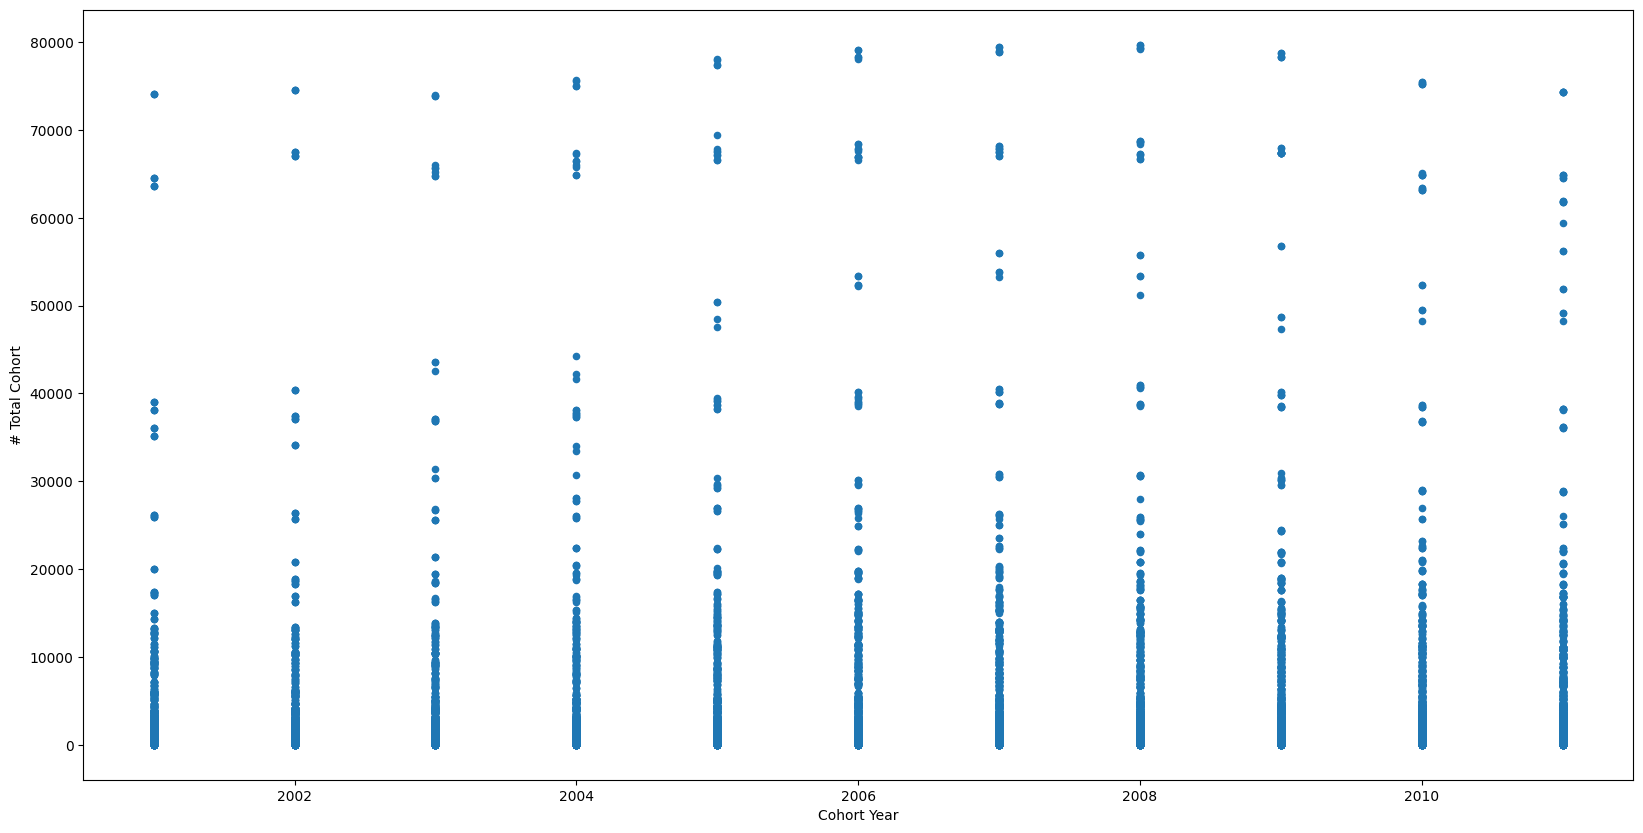

In [317]:
df_grad.plot(kind='scatter', x = 'Cohort Year', y = '# Total Cohort', figsize = (20, 10))
plt.show()
#only chart that can be made before converting rest to int or float

In [318]:
uniqueboro= df_grad['Geographic Subdivision'].unique()
uniqueboro

array(['Citywide', '1', '5', 'Bronx', 'Brooklyn', 'District 79',
       'Manhattan', 'Queens', 'Staten Island', '2', '3', '4', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '79', '84K355', '84K356', '84K357', '84K359',
       '84K395', '84K417', '84K473', '84K486', '84K508', '84K538',
       '84K608', '84K693', '84K712', '84K730', '84K738', '84K744',
       '84KXXX', '84M065', '84M279', '84M284', '84M433', '84M335',
       '84M336', '84M350', '84M353', '84M481', '84M522', '84M707',
       '84M709', '84M726', '84Q705', '84R012', '84X185', '84X200',
       '84X202', '84X208', '84X345', '84X347', '84X393', '84X395',
       '84X539', '84X553', '84X703', '84X704', '01M292', '01M448',
       '01M450', '01M458', '01M509', '01M515', '01M539', '01M650',
       '01M696', '02M047', '02M288', '02M294', '02M296', '02M298',
       '02M300', '02M303', '02M305', '02M308'

In [319]:
def map_borough(code):
    #creating boro column
    if code == 'Citywide':
        return 'Citywide'
    elif 'X' in code:
        return 'Bronx'  
    elif 'K' in code:
        return 'Brooklyn'  
    elif 'M' in code:
        return 'Manhattan'  
    elif 'Q' in code:
        return 'Queens'  
    elif 'S' in code:
        return 'Staten Island' 
    
    if len(code) >= 3:
        if code[-3] == 'K':
            return 'Brooklyn'
        elif code[-3] == 'X':
            return 'Bronx'
        elif code[-3] == 'M':
            return 'Manhattan'
        elif code[-3] == 'Q':
            return 'Queens'
        elif code[-3] == 'S':
            return 'Staten Island'
    
    return 'Other'


df_grad['Borough'] = df_grad['Geographic Subdivision'].apply(map_borough)

print(df_grad[['Geographic Subdivision', 'School Name', 'Borough']])

       Geographic Subdivision                     School Name   Borough
0                    Citywide                             NaN  Citywide
1                    Citywide                             NaN  Citywide
2                    Citywide                             NaN  Citywide
3                    Citywide                             NaN  Citywide
4                    Citywide                             NaN  Citywide
...                       ...                             ...       ...
278910                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278911                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278912                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278913                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278914                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn

[278915 rows x 3 columns]


In [320]:
df_grad.head()
df_grad.count()

Report Category                         278915
Geographic Subdivision                  278915
School Name                             250481
Category                                278915
Cohort Year                             278915
Cohort                                  278915
# Total Cohort                          278915
# Grads                                 278915
% Grads                                 278915
# Total Regents                         278915
% Total Regents of Cohort               278915
% Total Regents of Grads                277641
# Advanced Regents                      278891
% Advanced Regents of Cohort            278891
% Advanced Regents of Grads             277617
# Regents without Advanced              278891
% Regents without Advanced of Cohort    278891
% Regents without Advanced of Grads     277617
# Local                                 278915
% Local of Cohort                       278915
% Local of Grads                        277641
# Still Enrol

In [321]:
df_grad.isnull().sum()

Report Category                              0
Geographic Subdivision                       0
School Name                              28434
Category                                     0
Cohort Year                                  0
Cohort                                       0
# Total Cohort                               0
# Grads                                      0
% Grads                                      0
# Total Regents                              0
% Total Regents of Cohort                    0
% Total Regents of Grads                  1274
# Advanced Regents                          24
% Advanced Regents of Cohort                24
% Advanced Regents of Grads               1298
# Regents without Advanced                  24
% Regents without Advanced of Cohort        24
% Regents without Advanced of Grads       1298
# Local                                      0
% Local of Cohort                            0
% Local of Grads                          1274
# Still Enrol

In [322]:
df_grad.drop(columns=['% SACC (IEP Diploma) of Cohort','# TASC (GED)', '% TASC (GED) of Cohort', 'School Name'], inplace=True)

In [323]:
df_grad.drop(columns=['# SACC (IEP Diploma)'], inplace=True)

In [324]:
df_grad.isnull().sum()

Report Category                            0
Geographic Subdivision                     0
Category                                   0
Cohort Year                                0
Cohort                                     0
# Total Cohort                             0
# Grads                                    0
% Grads                                    0
# Total Regents                            0
% Total Regents of Cohort                  0
% Total Regents of Grads                1274
# Advanced Regents                        24
% Advanced Regents of Cohort              24
% Advanced Regents of Grads             1298
# Regents without Advanced                24
% Regents without Advanced of Cohort      24
% Regents without Advanced of Grads     1298
# Local                                    0
% Local of Cohort                          0
% Local of Grads                        1274
# Still Enrolled                           0
% Still Enrolled                           0
# Dropout 

In [325]:
df_grad.dropna(inplace=True)

In [326]:
df_grad.isnull().sum()


Report Category                         0
Geographic Subdivision                  0
Category                                0
Cohort Year                             0
Cohort                                  0
# Total Cohort                          0
# Grads                                 0
% Grads                                 0
# Total Regents                         0
% Total Regents of Cohort               0
% Total Regents of Grads                0
# Advanced Regents                      0
% Advanced Regents of Cohort            0
% Advanced Regents of Grads             0
# Regents without Advanced              0
% Regents without Advanced of Cohort    0
% Regents without Advanced of Grads     0
# Local                                 0
% Local of Cohort                       0
% Local of Grads                        0
# Still Enrolled                        0
% Still Enrolled                        0
# Dropout                               0
% Dropout                         

In [327]:
df_grad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277617 entries, 0 to 278914
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Report Category                       277617 non-null  object
 1   Geographic Subdivision                277617 non-null  object
 2   Category                              277617 non-null  object
 3   Cohort Year                           277617 non-null  int64 
 4   Cohort                                277617 non-null  object
 5   # Total Cohort                        277617 non-null  int64 
 6   # Grads                               277617 non-null  object
 7   % Grads                               277617 non-null  object
 8   # Total Regents                       277617 non-null  object
 9   % Total Regents of Cohort             277617 non-null  object
 10  % Total Regents of Grads              277617 non-null  object
 11  # Advanced Regents

In [328]:
df_grad.columns

Index(['Report Category', 'Geographic Subdivision', 'Category', 'Cohort Year',
       'Cohort', '# Total Cohort', '# Grads', '% Grads', '# Total Regents',
       '% Total Regents of Cohort', '% Total Regents of Grads',
       '# Advanced Regents', '% Advanced Regents of Cohort',
       '% Advanced Regents of Grads', '# Regents without Advanced',
       '% Regents without Advanced of Cohort',
       '% Regents without Advanced of Grads', '# Local', '% Local of Cohort',
       '% Local of Grads', '# Still Enrolled', '% Still Enrolled', '# Dropout',
       '% Dropout', 'Borough'],
      dtype='object')

In [329]:
columns_to_convert = [
    '# Grads', 
    '% Grads', 
    '# Total Regents', 
    '% Total Regents of Cohort', 
    '% Total Regents of Grads', 
    '# Advanced Regents', 
    '% Advanced Regents of Cohort', 
    '% Advanced Regents of Grads', 
    '# Regents without Advanced', 
    '% Regents without Advanced of Cohort', 
    '% Regents without Advanced of Grads', 
    '# Local', 
    '% Local of Cohort', 
    '% Local of Grads', 
    '# Still Enrolled', 
    '% Still Enrolled', 
    '# Dropout', 
    '% Dropout',  
]

for column in columns_to_convert:
    df_grad[column] = pd.to_numeric(df_grad[column], errors='coerce')

print(df_grad.dtypes)


Report Category                          object
Geographic Subdivision                   object
Category                                 object
Cohort Year                               int64
Cohort                                   object
# Total Cohort                            int64
# Grads                                 float64
% Grads                                 float64
# Total Regents                         float64
% Total Regents of Cohort               float64
% Total Regents of Grads                float64
# Advanced Regents                      float64
% Advanced Regents of Cohort            float64
% Advanced Regents of Grads             float64
# Regents without Advanced              float64
% Regents without Advanced of Cohort    float64
% Regents without Advanced of Grads     float64
# Local                                 float64
% Local of Cohort                       float64
% Local of Grads                        float64
# Still Enrolled                        

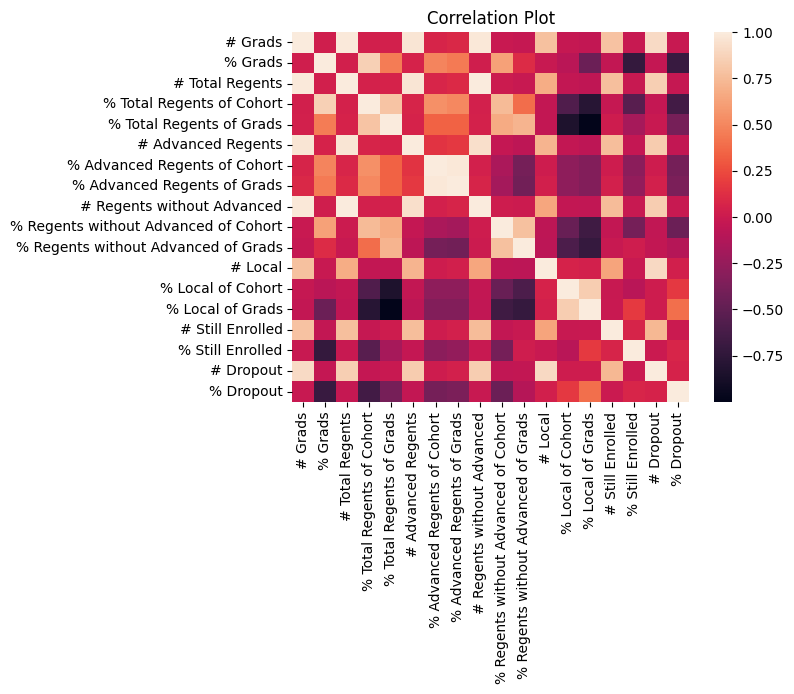

In [330]:
corr_matrix = df_grad[columns_to_convert].corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Plot')
plt.show()

In [331]:
corr_matrix

,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,# Advanced Regents,% Advanced Regents of Cohort,% Advanced Regents of Grads,# Regents without Advanced,% Regents without Advanced of Cohort,% Regents without Advanced of Grads,# Local,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout
# Grads,1.000000,0.026072,0.988447,0.033714,0.039413,0.967367,0.065084,0.089762,0.977210,-0.012089,-0.029020,0.780216,-0.024077,-0.039300,0.784021,-0.020660,0.907135,-0.015873
% Grads,0.026072,1.000000,0.034896,0.857797,0.445878,0.055773,0.490497,0.439175,0.025259,0.621254,0.103040,-0.017259,-0.083768,-0.446015,-0.046216,-0.721030,-0.033815,-0.695761
# Total Regents,0.988447,0.034896,1.000000,0.050443,0.057602,0.966281,0.073412,0.096904,0.993927,0.001012,-0.016753,0.676400,-0.042616,-0.057511,0.769497,-0.021925,0.850419,-0.026529
% Total Regents of Cohort,0.033714,0.857797,0.050443,1.000000,0.794784,0.069338,0.546271,0.506444,0.041335,0.744594,0.390518,-0.044237,-0.583991,-0.794427,-0.026630,-0.540874,-0.031935,-0.653174
% Total Regents of Grads,0.039413,0.445878,0.057602,0.794784,1.000000,0.062529,0.340954,0.343335,0.054317,0.666077,0.711283,-0.046092,-0.836770,-0.999602,0.010565,-0.177396,-0.013409,-0.393211
# Advanced Regents,0.967367,0.055773,0.966281,0.069338,0.062529,1.000000,0.141821,0.166360,0.932079,-0.031212,-0.063962,0.713117,-0.046245,-0.062410,0.760056,-0.033247,0.832857,-0.044804
% Advanced Regents of Cohort,0.065084,0.490497,0.073412,0.546271,0.340954,0.141821,1.000000,0.978176,0.042674,-0.152366,-0.401943,0.013399,-0.284311,-0.340686,0.014631,-0.297706,0.013623,-0.401709
% Advanced Regents of Grads,0.089762,0.439175,0.096904,0.506444,0.343335,0.166360,0.978176,1.000000,0.065237,-0.181969,-0.415969,0.036368,-0.288122,-0.343038,0.044294,-0.260814,0.040112,-0.367157
# Regents without Advanced,0.977210,0.025259,0.993927,0.041335,0.054317,0.932079,0.042674,0.065237,1.000000,0.014763,0.003766,0.646854,-0.040192,-0.054240,0.757771,-0.016638,0.840505,-0.018176
% Regents without Advanced of Cohort,-0.012089,0.621254,0.001012,0.744594,0.666077,-0.031212,-0.152366,-0.181969,0.014763,1.000000,0.781106,-0.062874,-0.462492,-0.665868,-0.043081,-0.400943,-0.048537,-0.450575


In [332]:
df_grad = pd.get_dummies(df_grad, columns = ['Borough'])
df_grad.head()

,Report Category,Geographic Subdivision,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,...,% Still Enrolled,# Dropout,% Dropout,Borough_Bronx,Borough_Brooklyn,Borough_Citywide,Borough_Manhattan,Borough_Other,Borough_Queens,Borough_Staten Island
0,Citywide,Citywide,All Students,2011,4 year August,74363,52409.0,70.5,49364.0,66.4,...,18.7,6664.0,9.0,False,False,True,False,False,False,False
1,Citywide,Citywide,All Students,2010,4 year August,75524,51681.0,68.4,48563.0,64.3,...,20.0,7309.0,9.7,False,False,True,False,False,False,False
2,Citywide,Citywide,All Students,2009,4 year August,78721,51970.0,66.0,49258.0,62.6,...,21.1,8363.0,10.6,False,False,True,False,False,False,False
3,Citywide,Citywide,All Students,2008,4 year August,79719,51573.0,64.7,49004.0,61.5,...,21.4,9096.0,11.4,False,False,True,False,False,False,False
4,Citywide,Citywide,All Students,2007,4 year August,79476,52069.0,65.5,44216.0,55.6,...,19.4,9631.0,12.1,False,False,True,False,False,False,False


In [333]:

feature_cols = ['% Total Regents of Cohort', '% Advanced Regents of Cohort', '% Regents without Advanced of Cohort', '% Still Enrolled', '% Dropout']

#feature
X = df_grad[feature_cols]

#kept getting error about nan values 
X = X.dropna()
y = df_grad['% Grads'].loc[X.index]  # Ensure y corresponds to rows in X

# splitting to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
linear_model = LinearRegression()

# training data
linear_model.fit(X_train, y_train)



LinearRegression()

In [334]:
prediction = linear_model.predict(X_test)

In [335]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print(f'R2: {r2}')

R2: 0.9523199576665196


In [336]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')

MSE: 23.818543199474874


In [337]:
rmse = mean_squared_error(y_test, prediction, squared = False)
print(f'RMSE: {rmse}')

RMSE: 4.880424489680674


/Users/nicolerodriguez/anaconda3/envs/env3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [338]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, prediction)
print(f'MAE: {mae}')

MAE: 2.7407497442776294


In [339]:
prediction # u can see all the predictions the model made based on the test data

array([91.16052761, 39.06619265, 57.47464928, ..., 88.36320018,
       37.24227065, 63.41853042])